# Pytorch tutorial
Taken from [here](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).

# Tensors

In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
# from numpy array
np_array = np.array(data)
print(np_array)

[[1 2]
 [3 4]]


In [4]:
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data. assuming rows and columns
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6473, 0.7912],
        [0.0512, 0.6617]]) 



In [6]:
shape = (4, 5,) # rows, columns, depth (height?)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor:\n{rand_tensor}\n')
print(f'Ones Tensor:\n{ones_tensor}\n')
print(f'Zeros Tensor:\n{zeros_tensor}\n')

Random Tensor:
tensor([[0.4243, 0.8908, 0.4014, 0.9179, 0.5448],
        [0.0248, 0.2829, 0.4383, 0.2235, 0.1077],
        [0.3116, 0.3787, 0.7498, 0.6633, 0.2018],
        [0.6138, 0.2431, 0.3195, 0.5880, 0.5416]])

Ones Tensor:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

Zeros Tensor:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])



## Tensor Attributes

In [7]:
tensor = torch.rand((3,4)) # or torch.rand(3,4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device Tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device Tensor is stored on: cpu


## Tensor Operations

In [8]:
# changes notebook settings to GPU
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


In [9]:
# slicing
tensor = torch.ones(4, 4)
print(tensor)
tensor[3,:] = 0
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])


In [10]:
# concatenating
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [11]:
# concatenating
t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])


In [12]:
# multiplying, element wise
print(tensor * tensor)
print(tensor.mul(tensor))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])


In [13]:
# matrix multiplication
print(tensor @ tensor)
print(tensor.T)
print(tensor.matmul(tensor.T))

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])
tensor([[4., 4., 4., 0.],
        [4., 4., 4., 0.],
        [4., 4., 4., 0.],
        [0., 0., 0., 0.]])


In [14]:
# in place
print(tensor, '\n')
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [5., 5., 5., 5.]])


## Bridge with NumPy

In [15]:
# like lists, memory locations can be shared
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [16]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# A Gentle Introduction to torch.autograd
Helps neural network training. Automatic differentiation engine.

**Forward propagation**: Inference. It runs the input data through each of the nodes.

**Backward propagation**: Adjust node parameters proportionate to the error in its guess. Traverses backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (*gradients*), and optimizing the parameters using gradient descent.

In [17]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

In [18]:
model = resnet18(weights=ResNet18_Weights.DEFAULT) # Deep Residual Learning for Image Recognition. 18 layers deep
data = torch.rand(1, 3, 64, 64) # 1 image, three channels, HxW of 64x64
labels = torch.rand(1, 1000) # 1000 labels

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


In [19]:
# forward pass
prediction = model(data)

In [24]:
# back propagation
loss = (prediction - labels).sum() # calculate error

# BP is kicked off. Autograd then calculates and stores the gradients for each
# model parameter in the parameter's .grad attribute
loss.backward()
# interesting error when you call this twice. gradients have not been cleared. Would overwrite previous gradients.

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [23]:
# register all the parameters of the model in the optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [25]:
# initiate gradient descent
# the optimizer adjusts each parameter by its gradient stored in .grad
optim.step()

## Differentiation in Autograd
Further reading later.

# Neural Networks
Typical training procedure for a neural network
 - Define the neural network that has some learnable parameters (or *weights*)
 - Iterate over a dataset of inputs
 - Process input through the network
 - Compute the loss (how far the output is from being correct)
 - Propagate gradients back into the network's parameters
 - Update the weights of the network

Below Neural Network is LeNet, named after Yann LeCun

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input, (120 nodes. 120 outputs. 400 inputs.)
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [28]:
# learnable parameters
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [29]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0647, -0.0913,  0.0902, -0.0407, -0.0919, -0.0211, -0.0375, -0.1097,
          0.1323,  0.0847]], grad_fn=<AddmmBackward0>)


In [30]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## Loss function

In [35]:
output = net(input)
target = torch.randn(10) # a dummy target
print(target)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor([ 0.3305, -1.3622,  0.8693, -0.8384,  0.6571,  1.5641, -0.4850,  0.4011,
        -0.0541,  0.8694])
tensor(0.7200, grad_fn=<MseLossBackward0>)


In [37]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop
To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

In [38]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0214, -0.0027,  0.0162, -0.0199,  0.0052,  0.0088])


## Update the weights

In [40]:
# simplest update rule used in practice is the Stochastic Gradient Descent (SGD)
# weight = weight - learning_rate * gradient
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)

In [43]:
f.data

tensor([-0.0432, -0.0944,  0.0339, -0.0307, -0.0733,  0.0556, -0.0845, -0.0975,
         0.1053,  0.0448])

In [44]:
# may want to use other update rules
import torch.optim as optim

# create optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [47]:
# in training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

**Note**

Observe how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated as explained in the Backprop section.

# Training a Classifier
You can now define a neural network, compute loss, and make updates to the weights of the network.

Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a torch.*Tensor.

- For images, packages such as Pillow, OpenCV are useful
- For audio, packages such as scipy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful

Now we will train a classifier. Do the following steps in order.
1. Load and normalize the CIFAR10 training and test sets using torchvision
2. Define a CNN
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 13031808.30it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


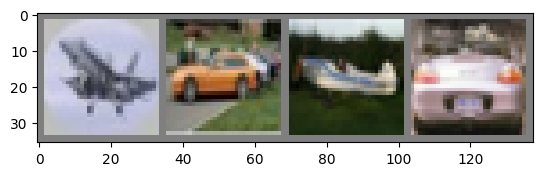

plane car plane car


In [5]:
# get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

## Define a CNN

In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [28]:
net.to(device) # GPU

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## Define a Loss function and optimizer


In [15]:
# cross entropy Loss with SGD update with momentum
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

In [29]:
for epoch in range(2): # 2 epochs i think
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # inputs, labels = data
    inputs, labels = data[0].to(device), data[1].to(device) # gpu. it was a little bit faster. need to change layer sizes

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + update
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item() # I suppose because the loss is very small
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.305
[1,  6000] loss: 2.303
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.305
[2,  2000] loss: 2.304
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.305
[2, 12000] loss: 2.304
Finished training


In [59]:
len(trainloader)

12500

In [62]:
len(next(iter(trainloader))) # 2. input, label. Batch size 4??

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


2

In [17]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Test the network on the test data
Make an inference and check against the ground truth.

In [18]:
dataiter = iter(testloader) # defining it in the same cell where you're iterating just reloads the iterator again and again

In [19]:
images, labels = next(dataiter)

print(len(images))
print(images[0])
print(len(labels))
print(labels)

4
tensor([[[ 0.2392,  0.2471,  0.2941,  ...,  0.0745, -0.0118, -0.0902],
         [ 0.1922,  0.1843,  0.2471,  ...,  0.0667, -0.0196, -0.0667],
         [ 0.1843,  0.1843,  0.2392,  ...,  0.0902,  0.0196, -0.0588],
         ...,
         [-0.4667, -0.6706, -0.7569,  ..., -0.7020, -0.8980, -0.6863],
         [-0.5216, -0.6157, -0.7255,  ..., -0.7961, -0.7725, -0.8431],
         [-0.5765, -0.5608, -0.6471,  ..., -0.8118, -0.7333, -0.8353]],

        [[-0.1216, -0.1294, -0.0902,  ..., -0.2549, -0.2863, -0.3333],
         [-0.1216, -0.1373, -0.1059,  ..., -0.2549, -0.2863, -0.3098],
         [-0.1373, -0.1451, -0.1294,  ..., -0.2314, -0.2549, -0.3020],
         ...,
         [-0.0275, -0.2157, -0.3098,  ..., -0.2392, -0.4980, -0.3333],
         [-0.0902, -0.2000, -0.3333,  ..., -0.3569, -0.3569, -0.4980],
         [-0.1608, -0.1765, -0.3020,  ..., -0.3961, -0.3412, -0.4745]],

        [[-0.6157, -0.6314, -0.6000,  ..., -0.7176, -0.7176, -0.7412],
         [-0.6000, -0.6863, -0.6471,  ..., 

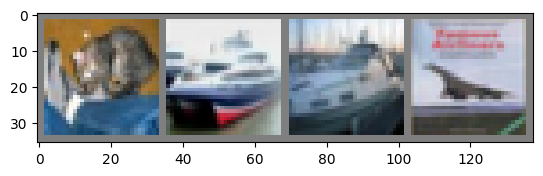

GroundTruth:  cat   ship  ship  plane


In [20]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Loading a saved model

In [21]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## Making more predictions

In [22]:
outputs = net(images)

In [23]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

# made a few mistakes!

Predicted:  cat   ship  ship  ship 


In [24]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [86]:
labels.size(0)

4

In [25]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again, no gradients needed
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1


In [26]:
# print accuracy for each class
for classname in classes:
  correct = correct_pred[classname]
  total = total_pred[classname]
  print(f'Accuracy for {classname:5s}: {100 * (correct / total):.1f}%')

Accuracy for plane: 56.2%
Accuracy for car  : 71.4%
Accuracy for bird : 24.0%
Accuracy for cat  : 55.2%
Accuracy for deer : 59.1%
Accuracy for dog  : 22.7%
Accuracy for frog : 77.1%
Accuracy for horse: 64.8%
Accuracy for ship : 83.4%
Accuracy for truck: 54.8%


## Training using a GPU?

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0
